# Workflow
    Predicting prices is a common task in machine learning, with applications in various domains such as real estate, finance, and e-commerce. This documentation outlines a general workflow for finding the right model for predicting prices using machine learning techniques.

    1)Data Collection and Exploration:

        Collect a dataset that includes relevant features (predictors) and the corresponding price values.
        Explore the dataset to gain insights into the data distribution, feature types, missing values, and potential outliers.
         the data by handling missing values, outliers, and performing necessary data transformations (e.g., scaling, encoding categorical variables).

    2)Feature Selection and Engineering:

        Identify the most important features that are likely to have a significant impact on predicting prices.
        Perform feature selection techniques (e.g., correlation analysis, feature importance from models) to select the most relevant features.
        Consider feature engineering techniques to create new features based on domain knowledge or data understanding, such as interaction terms, polynomial features, or binning.

    3)Model Selection:

        Select an appropriate machine learning algorithm for predicting prices. Common choices include linear regression, decision trees, random forests, gradient boosting, and support vector machines.
        Consider the specific requirements of the problem, such as interpretability, model complexity, handling non-linearity, and scalability, to guide the selection of the model.
        Start with a baseline model and gradually explore more complex models to find the optimal balance between model performance and complexity.

    4)Model Training and Evaluation:

        Split the dataset into training and testing sets. Use the training set for model training and the testing set for evaluation.
        Train the selected model on the training set using appropriate techniques, such as cross-validation, regularization, or hyperparameter tuning.
        Evaluate the model's performance on the testing set using appropriate evaluation metrics, such as mean squared error (MSE), mean absolute error (MAE), or R-squared.
        Compare the performance of different models and consider additional evaluation techniques like k-fold cross-validation to assess the models' stability and generalization ability.

    5)Model Optimization and Fine-tuning:

        Based on the evaluation results, identify the strengths and weaknesses of the models.
        Optimize the model by fine-tuning hyperparameters using techniques like grid search, random search, or Bayesian optimization.
        Consider ensemble methods, such as model averaging or stacking, to combine multiple models and improve predictive performance.

    6)Model Deployment and Monitoring:

        Once a satisfactory model is found, retrain it on the entire dataset (including training and testing sets) to maximize its predictive power.
        Deploy the model into a production environment and monitor its performance over time.
        Regularly update and retrain the model as new data becomes available or when the model's performance degrades.

    7)Model Interpretability:
        The process of finding the right model for predicting prices involves data collection, exploration, feature selection, model selection, training, evaluation, optimization, and deployment. It is an iterative process that requires careful consideration of various factors, including data quality, feature importance, model complexity, and evaluation metrics. By following this workflow, one can identify an effective model that provides accurate price predictions in machine learning applications.

In [94]:
#instaling the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import lightgbm
from datetime import datetime


In [95]:
df = pd.read_csv('Model_data.csv')

df = df.drop(columns=['Unnamed: 0',],axis= 1)  # dropping the irreleavnt columns
df.head()

,status,bed,bath,acre_lot,city,state,ALand,AWater,house_size,State_ab,...,Mean,Median,Stdev,sum_w,prone_to_natural_disasters,prev_sold_date,OldsellingPrice,CSUSHPISA,percentage_change,new_selling_price
0,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,36810.0,1192.0,MA,...,58507.0,48258.0,47247.0,1091.221424,1,2019-06,110000.0,208.701,0.428675,157154.3
1,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,0.0,1192.0,CT,...,81277.0,77849.0,52697.0,406.038436,1,2019-06,110000.0,208.701,0.428675,157154.3
2,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,36810.0,1192.0,MA,...,58507.0,48258.0,47247.0,1091.221424,1,2019-06,110000.0,208.701,0.428675,157154.3
3,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,229666.0,1192.0,MA,...,16468.0,17561.0,10634.0,37.330667,1,2019-06,110000.0,208.701,0.428675,157154.3
4,for_sale,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,0.0,1192.0,MA,...,46149.0,38639.0,39421.0,355.739179,1,2019-06,110000.0,208.701,0.428675,157154.3


# presenting you the details of the features present

    ALand
    Type: Double
    Description: The Square area of land at the geographic or track location

    AWater
    Type: Double
    Description: The Square area of water at the geographic or track location.

    Mean
    Type: Double
    Description: The mean household income of the specified geographic location.

    Median
    Type: Double
    Description: The median household income of the specified geographic location.
    
    Stdev
    Type: Double
    Description: The standard deviation of the household income for the specified geographic 




In [96]:
# renaming the columns for better undrstanding

new_column_names = {'Mean':'Average(Area Income)',
                    'Median':'Median(Area Income)',
                    'Stdev':'StandardDeviation(Area Income)',
                    'sum_w':'Total_house_holds',
                    'OldsellingPrice':'Old_Selling_Price'}

df = df.rename(columns=new_column_names)

In [97]:
# getting the age of the house from the features which will help in the regression based problem

df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'])
current_year = datetime.now().year
df['house_age'] = current_year - df['prev_sold_date'].dt.year

# as the new selling price has alrady been calculated so we wont be needing the 'CSUSHPISA' any more for training our model
    1) This is done to avoid overfitting as i have already calculated new_slling_price using the index and percentage change

In [98]:
# rerranging the colummns after new feature addidtion

new_cols = ['bed', 'bath', 'acre_lot', 'city', 'state', 'ALand', 'house_size',
       'State_ab', 'Type', 'Average(Area Income)',
       'prone_to_natural_disasters', 'prev_sold_date','house_age','Old_Selling_Price',
       'new_selling_price' ]

df = df[new_cols]


# we wont be requiring this feature as new more necessary features has been derived from it
df = df.drop(columns='prev_sold_date',axis=1)


In [99]:
# checking for null values

df.isnull().sum()

bed                              0
bath                             0
acre_lot                         0
city                             0
state                            0
ALand                            0
house_size                       0
State_ab                         0
Type                             0
Average(Area Income)             0
prone_to_natural_disasters       0
house_age                        0
Old_Selling_Price                0
new_selling_price             2777
dtype: int64

In [100]:
df = df.dropna()


# checking the descriptive function of the dataframe and finding out any outliers

In [101]:
def custom_summary(df): 
    
    result = []
    
    for col in df.columns:
        
        if df[col].dtype != 'O':
        
            stats = OrderedDict ({
                'Feature_Name' : col,
                'Count':df[col].count(),
                'Minimum':df[col].min(),
                'Quarter 1':df[col].quantile(0.25), 
                "Mean":df[col].mean(),
                'Median':df[col].median(),
                'Quarter 3':df[col].quantile(0.75),
                'Maximum':df[col].max(),
                "Variance":df[col].var(),
                'Standard Deviation':df[col].std(),
                "Kurtosis":df[col].kurt(),
                'Skewness':df[col].skew() ,
                'IQR':df[col].quantile(0.75) - df[col].quantile(0.25)
            })
            
            result.append(stats)
        
        
    result_df = pd.DataFrame(result)
    
    skewtype =[]
    
    for i in result_df['Skewness']:
        if i<=-1:
            skewtype.append('Highly Negatively Skewed')
        elif i<= -0.5:
            skewtype.append('Moderately Negatively Skewed')
        elif -0.5 < i < 0 :
            skewtype.append('Approx Normal Distribution (-ve)')
        elif 0 <= i < 0.5:
            skewtype.append('Approx Normal Distribution (+ve)')
        elif 0.5<= i < 1:
            skewtype.append('Moderately Positively Skewed')
        elif i >= 1:
            skewtype.append('Highly Positively Skewed')
    
    result_df['Skew_Type'] = skewtype
    
    k_type = []
    
    for i in result_df['Kurtosis']:
        if i <=  -1:
            k_type.append('Highly Platykurtic Curve')
        elif -1 < i <= -0.5:#-.9 to .9
            k_type.append('Moderately Platykurtic Curve')
        elif -0.5 < i <= 0.5: #-1,-2,-3...
            k_type.append('Mesokurtic Curve')
        elif 0.5<= i < 1:
            k_type.append('Moderately Leptokurtic Curve')
        elif i >= 1:
            k_type.append('Highly Leptokurtic Curve')
            
        
    
    result_df['Kurtosis_Type'] = k_type
    
    
    #Outlier detection
    

    Upper_limit = stats['Quarter 3'] + 1.5*stats['IQR']
    
    lower_limit = stats['Quarter 1'] -1.5*stats['IQR']
    
    if len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)]) > 0:
        
        outlier_comment = 'has outliers'
        outlier_percentage = len([x for x in df[col] if (x < lower_limit) or (x > Upper_limit)])/len(df)
    else:
        oulier_comment = 'no outliers'
        
        outlier_percentage = 0
        
    result_df['outlier_comment'] = outlier_comment
    
    result_df['outlier_percentage'] = outlier_percentage
   
    return result_df

In [102]:
custom_summary(df)

,Feature_Name,Count,Minimum,Quarter 1,Mean,Median,Quarter 3,Maximum,Variance,Standard Deviation,Kurtosis,Skewness,IQR,Skew_Type,Kurtosis_Type,outlier_comment,outlier_percentage
0,bed,78861,1.00,3.00,3.647773e+00,3.00,4.00,33.0,2.627532e+00,1.620966e+00,21.489460,2.770198,1.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
1,bath,78861,1.00,2.00,2.586056e+00,2.00,3.00,19.0,2.256521e+00,1.502172e+00,12.558027,2.569843,1.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
2,acre_lot,78861,0.00,0.13,3.866490e+00,0.29,0.83,18817.0,4.056359e+04,2.014040e+02,8686.433835,93.027083,0.70,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
3,ALand,78861,0.00,339676.00,3.932772e+06,1089768.00,2859549.00,607294625.0,1.870254e+14,1.367572e+07,926.596492,23.681793,2519873.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
4,house_size,78861,170.00,1320.00,2.344875e+03,1875.00,2796.00,20821.0,2.945828e+06,1.716341e+03,19.133424,3.412962,1476.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
5,Average(Area Income),78861,0.00,52381.00,7.643624e+04,74846.00,94588.00,183195.0,1.073300e+09,3.276126e+04,0.023824,0.478284,42207.00,Approx Normal Distribution (+ve),Mesokurtic Curve,has outliers,0.087952
6,prone_to_natural_disasters,78861,0.00,0.00,5.187862e-01,1.00,1.00,1.0,2.496502e-01,4.996501e-01,-1.994396,-0.075199,1.00,Approx Normal Distribution (-ve),Highly Platykurtic Curve,has outliers,0.087952
7,house_age,78861,1.00,8.00,1.652258e+01,17.00,23.00,36.0,8.426633e+01,9.179670e+00,-0.830444,0.099226,15.00,Approx Normal Distribution (+ve),Moderately Platykurtic Curve,has outliers,0.087952
8,Old_Selling_Price,78861,10000.00,339000.00,8.242586e+05,499900.00,799000.00,60000000.0,1.870959e+12,1.367830e+06,359.837692,12.567681,460000.00,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952
9,new_selling_price,78861,21270.22,609623.19,1.983422e+06,1057332.88,1955150.25,132549641.4,1.520048e+13,3.898780e+06,200.617002,10.721486,1345527.06,Highly Positively Skewed,Highly Leptokurtic Curve,has outliers,0.087952


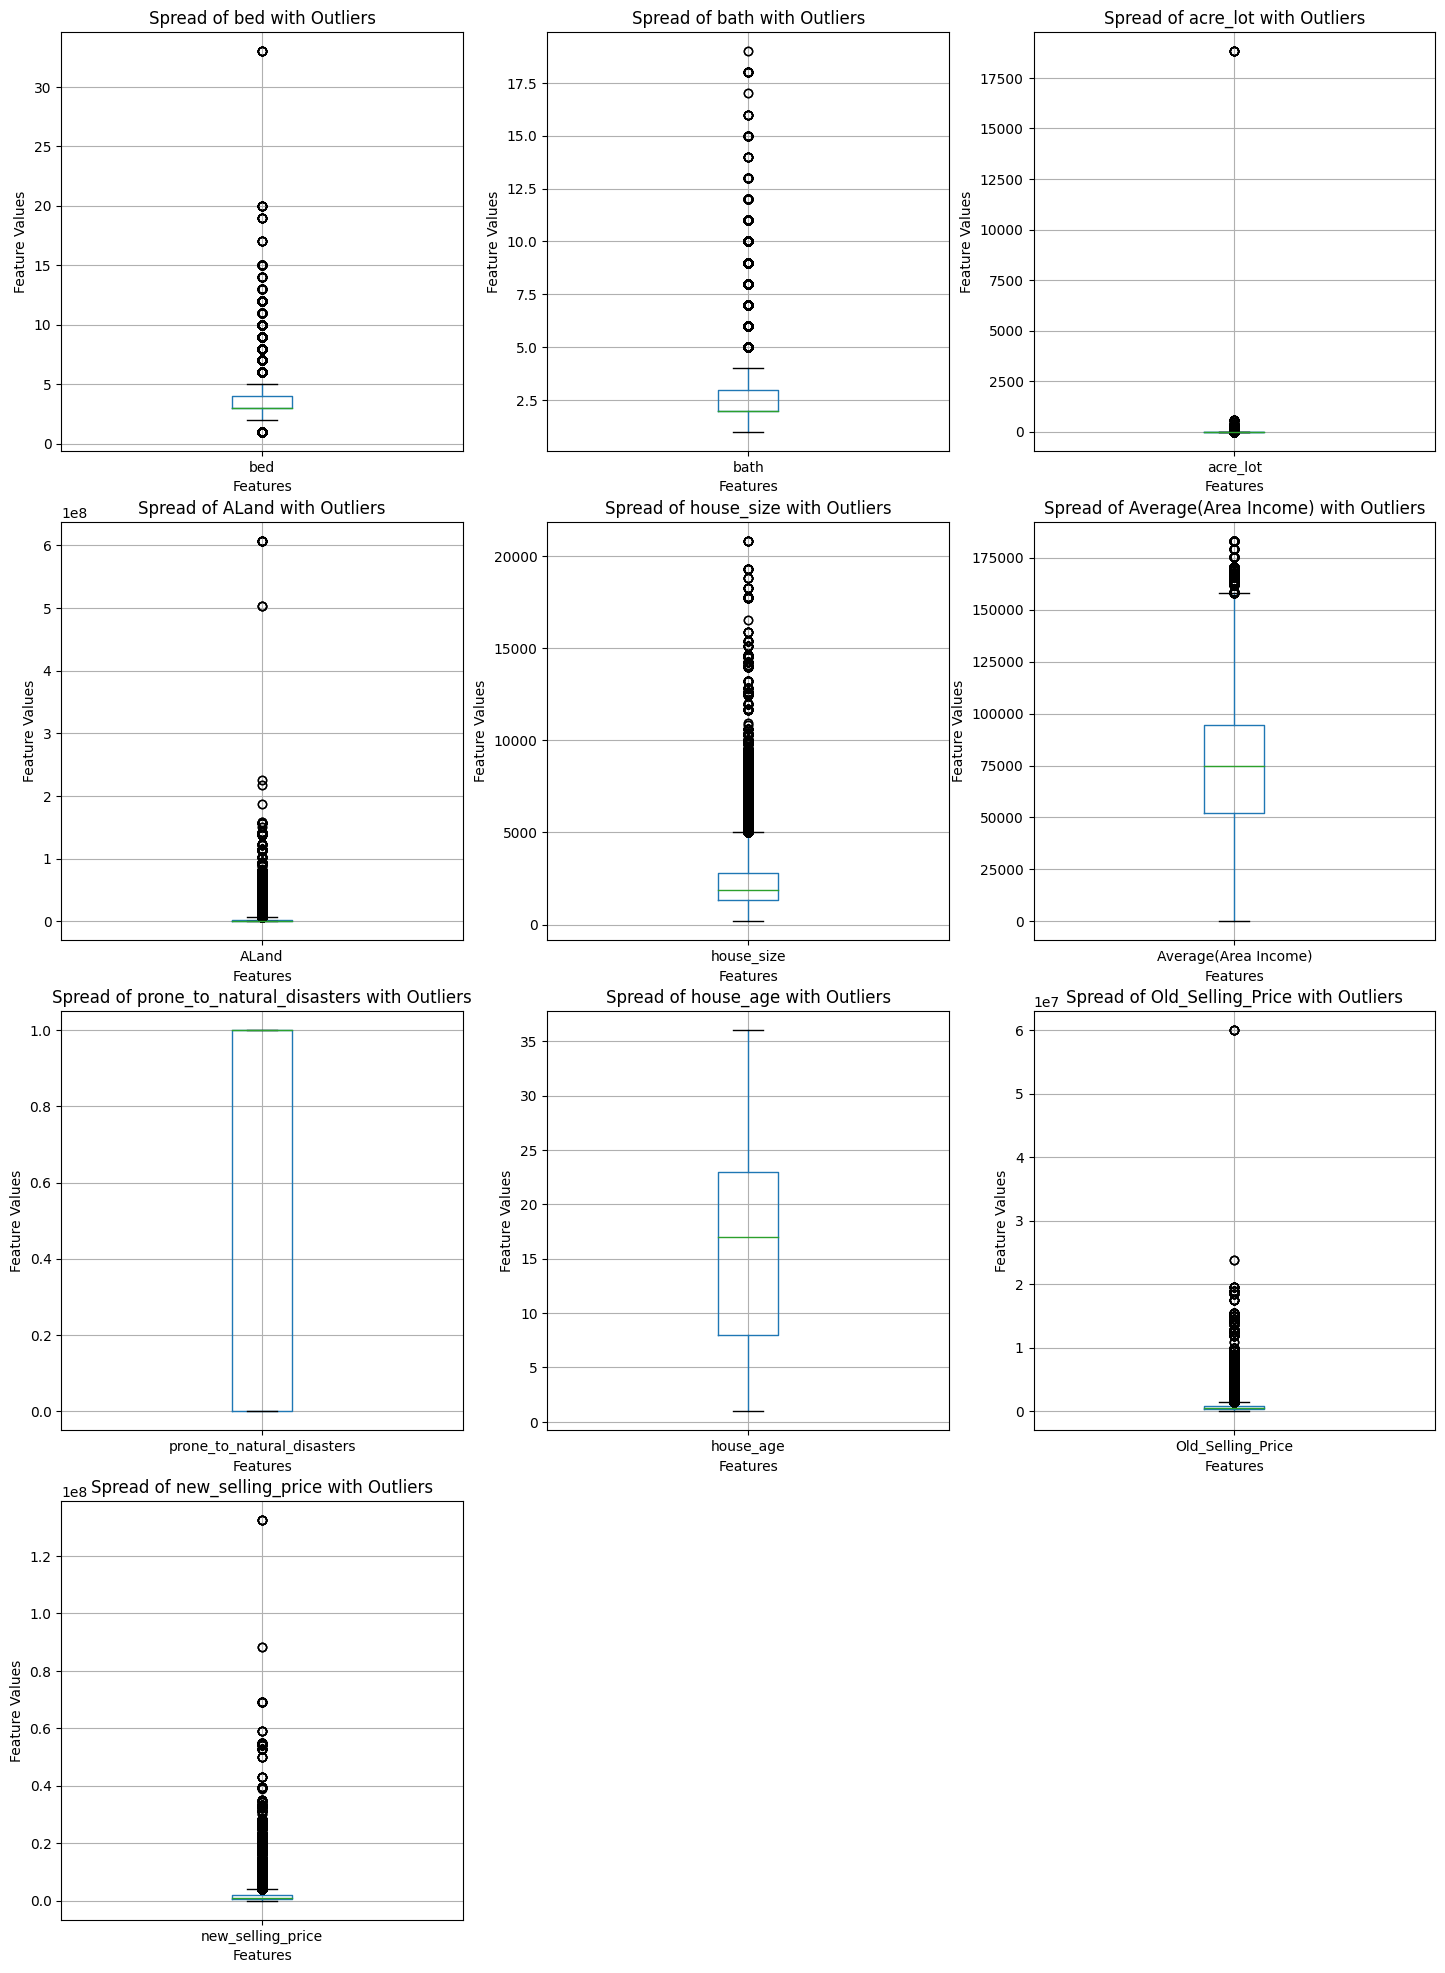

In [103]:
numeric_columns = [col for col in df.columns if df[col].dtype != 'O']
num_plots = len(numeric_columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout(pad=3.0)

for i, column in enumerate(numeric_columns):
    ax = axes[i // num_cols, i % num_cols]
    df.boxplot(column=column, ax=ax)
    ax.set_title(f'Spread of {column} with Outliers')
    ax.set_ylabel('Feature Values')
    ax.set_xlabel('Features')

# Hide empty subplots if the number of plots is not a multiple of num_cols
for i in range(num_plots, num_rows*num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.show()

In [104]:
# checking for duplicates

duplicate_rows = df.duplicated()
total_duplicates = duplicate_rows.sum()


print("Total number of duplicated rows:",total_duplicates)

Total number of duplicated rows: 8130


In [105]:
# dropping them

df = df.drop_duplicates()
df = df.reset_index(drop=True)

df.shape

(70731, 14)

In [106]:
df.head()

,bed,bath,acre_lot,city,state,ALand,house_size,State_ab,Type,Average(Area Income),prone_to_natural_disasters,house_age,Old_Selling_Price,new_selling_price
0,7.0,3.0,0.09,Dorado,Puerto Rico,2859549.0,1192.0,MA,Track,58507.0,1,4,110000.0,157154.3
1,7.0,3.0,0.09,Dorado,Puerto Rico,5745207.0,1192.0,CT,Track,81277.0,1,4,110000.0,157154.3
2,7.0,3.0,0.09,Dorado,Puerto Rico,1678138.0,1192.0,MA,Track,16468.0,1,4,110000.0,157154.3
3,7.0,3.0,0.09,Dorado,Puerto Rico,1258340.0,1192.0,MA,Track,46149.0,1,4,110000.0,157154.3
4,5.0,4.0,0.99,Saint Thomas,Virgin Islands,72079712.0,5000.0,MA,Track,81043.0,1,10,950000.0,1778798.8


In [107]:
df = df.drop(columns=['State_ab'],axis=1)

In [108]:
unique_values = df['city'].unique()

print(unique_values)

['Dorado' 'Saint Thomas' 'Agawam' 'Pelham' 'Amherst' 'Granby' 'Whately'
 'Sunderland' 'Chicopee' 'Belchertown' 'South Hadley' 'Ludlow' 'Orange'
 'Holyoke' 'Easthampton' 'Northampton' 'Barre' 'Leverett' 'Southampton'
 'Greenfield' 'Deerfield' 'West Springfield' 'Hadley' 'Williamsburg'
 'Springfield' 'Montague' 'Athol' 'Blandford' 'East Windsor' 'Ware'
 'Ellington' 'Vernon' 'Longmeadow' 'Stafford' 'Manchester' 'Enfield'
 'Palmer' 'Brimfield' 'Chester' 'Cummington' 'Becket' 'Westfield' 'Savoy'
 'Southwick' 'East Longmeadow' 'Granville' 'Hardwick' 'Adams' 'Buckland'
 'Worthington' 'Pittsfield' 'Cheshire' 'Huntington' 'Otis' 'Winchester'
 'Great Barrington' 'North Canaan' 'Suffield' 'Sheffield' 'Monterey'
 'Windsor Locks' 'Barkhamsted' 'Norfolk' 'Colebrook' 'Sandisfield'
 'Canton' 'Simsbury' 'New Marlborough' 'Hinsdale' 'Plainfield' 'Dalton'
 'Lanesborough' 'East Granby' 'Windsor' 'Tyringham' 'Russell'
 'North Adams' 'Florida' 'Hubbardston' 'Wilbraham' 'Westminster' 'Oakham'
 'West Brookfie

In [109]:
# here to avoid computational backlog we are abvoiding cities
df = df.drop(columns='city',axis=1)

In [110]:
unique_values = df['Type'].unique()

print(unique_values)

['Track' 'City' 'CDP' 'Borough' 'Village']


In [111]:
unique_values = df['Type'].unique()

print(unique_values)

['Track' 'City' 'CDP' 'Borough' 'Village']


In [112]:
state_names = ['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
               'New Hampshire', 'Vermont', 'New York', 'Rhode Island', 'Maine']
encoded_values = [5, 8, 2, 0, 3, 7, 4, 6, 1]

data = {'State': state_names, 'Encoded Value': encoded_values}
state_info = pd.DataFrame(data)

print(state_info)

            State  Encoded Value
0     Puerto Rico              5
1  Virgin Islands              8
2   Massachusetts              2
3     Connecticut              0
4   New Hampshire              3
5         Vermont              7
6        New York              4
7    Rhode Island              6
8           Maine              1


In [113]:
type_names = ['Track', 'City', 'CDP', 'Borough', 'Village']
encoded_values = [3, 2, 1, 0, 4]

data = {'Type': type_names, 'Encoded Value': encoded_values}
Type_info = pd.DataFrame(data)

print(Type_info)

      Type  Encoded Value
0    Track              3
1     City              2
2      CDP              1
3  Borough              0
4  Village              4


In [114]:
encoder = LabelEncoder()

categorical_features = ['state','Type']

for column in categorical_features:

    df[column] = encoder.fit_transform(df[column])

In [115]:
df.head()


,bed,bath,acre_lot,state,ALand,house_size,Type,Average(Area Income),prone_to_natural_disasters,house_age,Old_Selling_Price,new_selling_price
0,7.0,3.0,0.09,5,2859549.0,1192.0,3,58507.0,1,4,110000.0,157154.3
1,7.0,3.0,0.09,5,5745207.0,1192.0,3,81277.0,1,4,110000.0,157154.3
2,7.0,3.0,0.09,5,1678138.0,1192.0,3,16468.0,1,4,110000.0,157154.3
3,7.0,3.0,0.09,5,1258340.0,1192.0,3,46149.0,1,4,110000.0,157154.3
4,5.0,4.0,0.99,8,72079712.0,5000.0,3,81043.0,1,10,950000.0,1778798.8


In [116]:

def correlation_target(data,target_col):

   

    new_df = df.drop([target_col],axis=1)
    indep_cols = new_df.columns

    correlation_result = []

    for col in indep_cols:

        correlation_result.append(data[target_col].corr(data[col]))

    result_df = pd.DataFrame([indep_cols,correlation_result],index=['Variable','Correlation']).T

    return result_df.sort_values('Correlation',ascending=False)

In [117]:
correlation_target(df,'new_selling_price')

,Variable,Correlation
10,Old_Selling_Price,0.928236
5,house_size,0.595853
1,bath,0.573236
0,bed,0.289066
9,house_age,0.271762
7,Average(Area Income),0.025516
2,acre_lot,0.010621
6,Type,0.009964
8,prone_to_natural_disasters,0.002127
4,ALand,-0.020133


# The Correlation matrix says that the feature name Arealand , state,prone_to_natural_disasters has very low feature to play , so we can remove it to make the model more smooth
     but we are going to keep state and type as identifiers

In [118]:
df = df.drop(columns=['ALand','prone_to_natural_disasters'],axis=1)

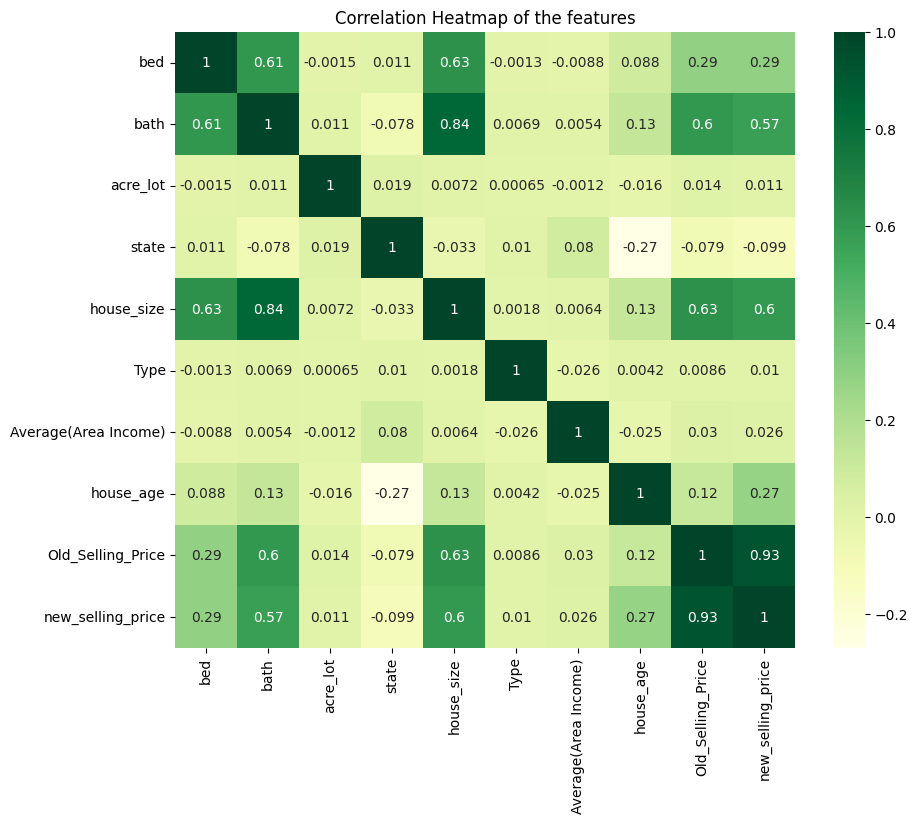

In [119]:
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,annot=True,cmap="YlGn")
plt.title("Correlation Heatmap of the features")
plt.show()

#
    From the heatmap it is safe to say that the "Old_selling_price" has the highest correlation , followed by "house_Size" ,"bathroom_numbers"

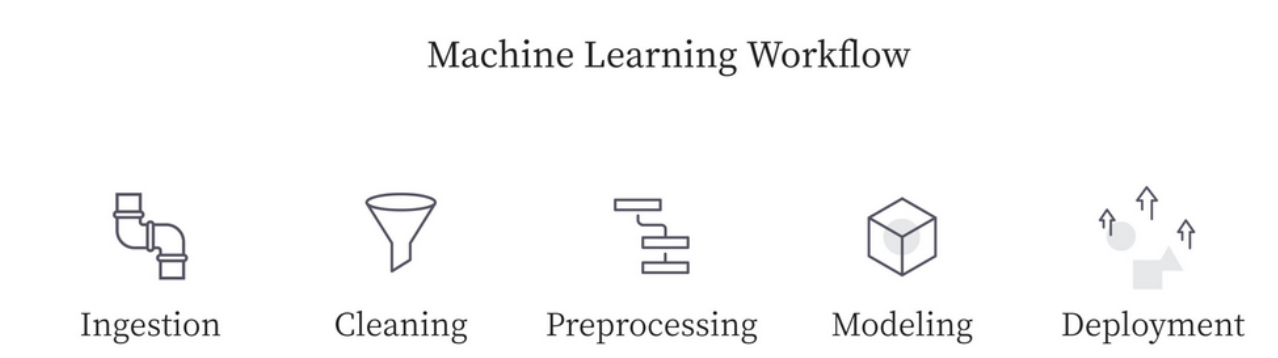

#   
    now the data is ready to be split and ready for training models and make predictions for future references

# import Section

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,median_absolute_error,r2_score,explained_variance_score
from sklearn.model_selection import cross_val_score


In [121]:
# splitting the data
df['Old_Selling_Price'] = pd.to_numeric(df['Old_Selling_Price'], errors='coerce')

X  = df.drop(columns=['new_selling_price'],axis=1)
Y = df[['new_selling_price']]

In [122]:
# traning and test data
X_train , X_test ,Y_train , Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [123]:


LinearRegressionPipeline = Pipeline([('scaler',StandardScaler()),
                                    ('linearRegression',LinearRegression())])


Gradientregressorpipeline = Pipeline([('scaler',StandardScaler()),
                                    ('linearRegression',GradientBoostingRegressor())])


RandomForestPipeline = Pipeline([('scaler',StandardScaler()),
                                    ('randomforest',RandomForestRegressor())])

Xgboostpipeline = Pipeline([('scaler',StandardScaler()),
                                    ('randomforest',XGBRegressor())])

LGMBpipeline = Pipeline([('scaler',StandardScaler()),
                                    ('randomforest',LGBMRegressor())])

In [124]:
pipeline_dict = {'Linear Regression': LinearRegressionPipeline,
                 'Gradient Boosting': Gradientregressorpipeline,
                 'Random Forest':RandomForestPipeline,
                 'Xgboost':Xgboostpipeline,
                 'LGBM':LGMBpipeline}


results = pd.DataFrame(index=pipeline_dict.keys(),
                       columns= ['Mean Absolute Error','Median Absolute Error','R2 Score','Explained Variance '])

highest_Score = -float('inf')
best_model = ''

for name , pipeline in pipeline_dict.items():
    pipeline.fit(X_train,Y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(Y_test,y_pred)
    medae = median_absolute_error(Y_test,y_pred)
    r2 = r2_score(Y_test,y_pred)
    ev = explained_variance_score(Y_test,y_pred)

    results.loc[name] = [mae,medae,r2,ev]

    if r2 > highest_Score:
        highest_Score = r2
        best_model = name

print("Evaluation Metrics:")
print(results)
print("\nBest Model(with the highest r2 score):",best_model)
print("Results for the best model:")
print(results.loc[best_model])

Evaluation Metrics:
                  Mean Absolute Error Median Absolute Error  R2 Score  \
Linear Regression       547773.064141         323668.694977  0.890157   
Gradient Boosting        75976.654003          41910.650027  0.998598   
Random Forest             3630.287171                   0.0  0.999581   
Xgboost                  19730.911867             13181.975  0.999678   
LGBM                     43312.710863          21477.286133  0.996432   

                  Explained Variance   
Linear Regression            0.890161  
Gradient Boosting            0.998598  
Random Forest                0.999581  
Xgboost                      0.999678  
LGBM                         0.996432  

Best Model(with the highest r2 score): Xgboost
Results for the best model:
Mean Absolute Error      19730.911867
Median Absolute Error       13181.975
R2 Score                     0.999678
Explained Variance           0.999678
Name: Xgboost, dtype: object


In [125]:
models = {'Linear Regression': LinearRegression(),
                 'Random Forest':RandomForestRegressor(),
                 'Xgboost':XGBRegressor(),
                 }

scoring = ['neg_mean_absolute_error', 'neg_median_absolute_error', 'r2', 'explained_variance']

results = pd.DataFrame(columns=['Model', 'Metric', 'Score'])


for name , model in models.items():

    for metric in scoring:
        scores = cross_val_score(model,X,Y,cv=5,scoring=metric)
        mean_score = np.mean(scores)
        std_score = np.std(scores)
        results = results.append({'Model':name,'Metric':metric,'Score':mean_score},ignore_index=True)
        

print(results)

                Model                     Metric          Score
0   Linear Regression    neg_mean_absolute_error -575120.517885
1   Linear Regression  neg_median_absolute_error -340504.589084
2   Linear Regression                         r2       0.808897
3   Linear Regression         explained_variance       0.810501
4       Random Forest    neg_mean_absolute_error  -28057.348839
5       Random Forest  neg_median_absolute_error   -2916.279550
6       Random Forest                         r2       0.989890
7       Random Forest         explained_variance       0.990910
8             Xgboost    neg_mean_absolute_error  -42618.094384
9             Xgboost  neg_median_absolute_error  -16210.750000
10            Xgboost                         r2       0.977686
11            Xgboost         explained_variance       0.977704


In [126]:
best_model = results.groupby('Model')['Score'].max().idxmax()
best_score = results.loc[results['Model']==best_model,'Score'].max()


print("The best Model is :",best_model)

The best Model is : Random Forest


# so now we tune a random forest regressor to find the best predictive accuracy among it